In [14]:
import numpy as np 
import pandas as pd 

import os
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import tensorflow as tf
from tensorflow import keras
warnings.filterwarnings("ignore")

2024-07-27 14:52:12.895685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 14:52:12.895897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 14:52:13.058864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!ls /kaggle/input/age-gender-and-ethnicity-face-data-csv

age_gender.csv


In [4]:
dataset=pd.read_csv("/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")

In [5]:
dataset.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
dataset.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


<Axes: xlabel='gender', ylabel='count'>

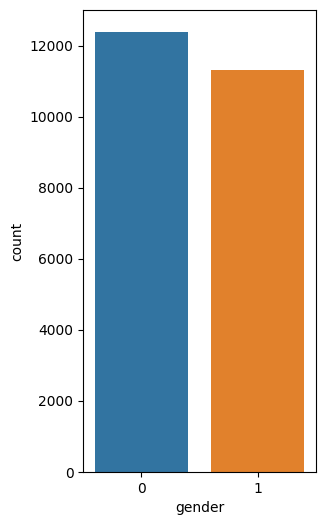

In [17]:
plt.figure(figsize=(3,6))
sns.countplot(data=dataset,x="gender")


<Axes: xlabel='ethnicity', ylabel='count'>

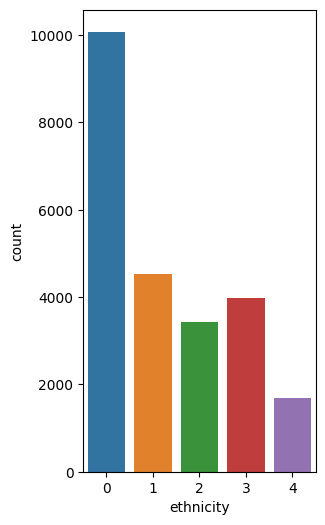

In [18]:
plt.figure(figsize=(3,6))
sns.countplot(data=dataset,x="ethnicity")


In [20]:
dataset.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [22]:
dataset["pixels"]=dataset["pixels"].apply(lambda x: np.array(x.split (),dtype="float32"))
dataset.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [23]:
X=np.array(dataset["pixels"].tolist())

In [24]:
X

array([[129., 128., 128., ..., 146., 146., 146.],
       [164.,  74., 111., ..., 182., 170., 148.],
       [ 67.,  70.,  71., ..., 112., 111., 108.],
       ...,
       [ 59.,  50.,  37., ...,  98.,  78.,  78.],
       [ 45., 108., 120., ...,  32.,  35.,  35.],
       [156., 161., 160., ..., 190., 184., 174.]], dtype=float32)

In [25]:
X.shape

(23705, 2304)

In [28]:
X= X.reshape(-1,48,48,1)

In [29]:
X.shape

(23705, 48, 48, 1)

Text(0.5, 0, 'Age: 1 Ethnicity: 2 Gender: 0')

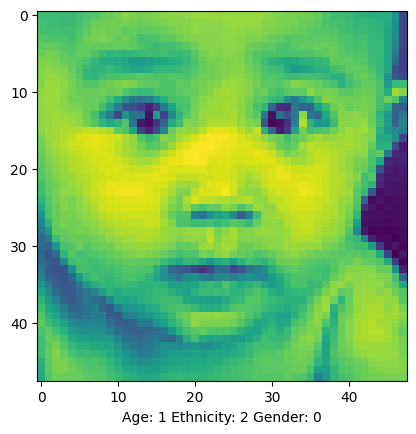

In [31]:
plt.imshow(X[0])
plt.xlabel(

"Age: "+str(dataset["age"].iloc[0])+" Ethnicity: "+ str(dataset["ethnicity"].iloc[0])+" Gender: "+str(dataset["gender"].iloc[0])
)

In [32]:
dataset["age"]=pd.cut(dataset["age"],bins=[0,5,20,40,65,116],labels=["0","1","2","3","4"])


In [33]:
dataset.head()

,age,ethnicity,gender,img_name,pixels
0,0,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,0,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,0,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,0,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,0,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [36]:
from tensorflow.keras.utils import to_categorical

y=to_categorical(np.array(dataset["age"]),num_classes=5)

In [37]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [43]:
model_age=Sequential()
model_age.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(MaxPool2D(pool_size=(2,2)))
model_age.add(Flatten())

model_age.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_age.add(Dropout(0.5))
model_age.add(Dense(5,activation='softmax'))

# sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_age.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [45]:
epochs = 10 
batch_size = 64

history_age = model_age.fit(X_train, Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - accuracy: 0.5464 - loss: 4.8259 - val_accuracy: 0.6334 - val_loss: 1.7216 - learning_rate: 0.0010
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8235 - loss: 1.3640 - val_accuracy: 0.6312 - val_loss: 1.7155 - learning_rate: 0.0010
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.6898 - loss: 1.4308 - val_accuracy: 0.6988 - val_loss: 1.0549 - learning_rate: 0.0010
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7647 - loss: 0.8821 - val_accuracy: 0.6879 - val_loss: 1.0783 - learning_rate: 0.0010
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.7088 - loss: 1.0009 - val_accuracy: 0.7070 - val_loss: 0.9508 - learning_rate: 0.0010
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6471 - loss: 0.8948 - val_accuracy: 0.7070 - val_loss: 0.9471 - learning_rate: 0.0010
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - accuracy: 0.7255 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0


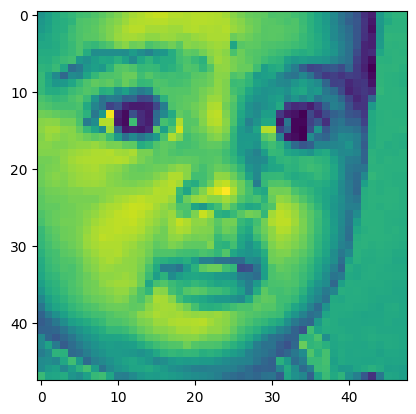

In [53]:

plt.imshow(X_test[200])
prediction=model_age.predict(np.expand_dims(X_test[200], axis=0))
print(np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2


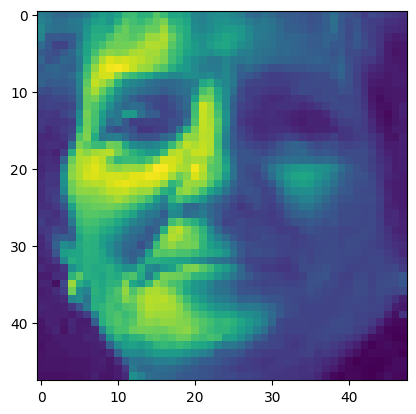

In [54]:
plt.imshow(X_test[202])
prediction=model_age.predict(np.expand_dims(X_test[202], axis=0))
print(np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2


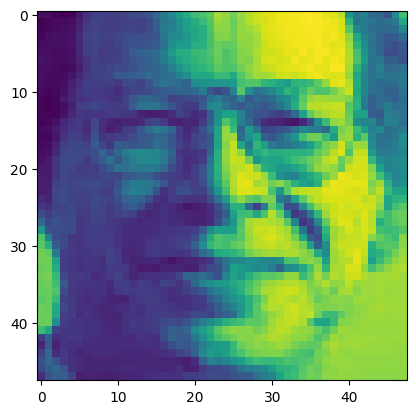

In [55]:
plt.imshow(X_test[102])
prediction=model_age.predict(np.expand_dims(X_test[202], axis=0))
print(np.argmax(prediction))